In [1]:
import pylab as pl
import numpy as np
from math import pi, sqrt, sin
%matplotlib notebook

<IPython.core.display.Javascript object>


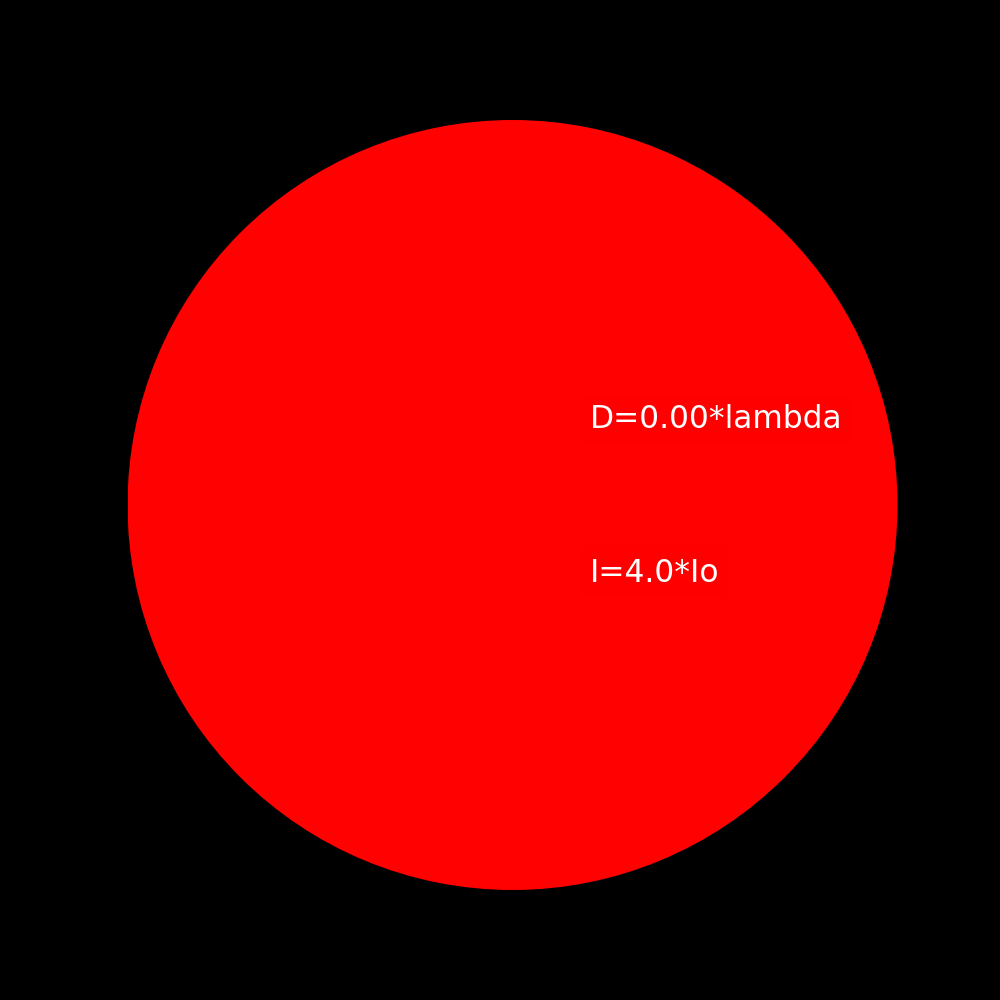

interactive(children=(FloatSlider(value=0.0, description='d', max=6.283185307179586), FloatSlider(value=1.0, d…

In [2]:
#2 Waves interference - Michelson Dk=0 - fig. 3.9
from ipywidgets import interact
import matplotlib.patches as patches
pl.style.use('dark_background')
fig=pl.figure(figsize=(8,8))
@interact(d=(0,2*pi), gcc=(0,1.0))
#d=d2-d1 , gcc: magnitude of the complex degree of coherence
def I0(d=0,gcc=1):
    Io=64
    w=2
    intim=np.ones((1,1,3))
    I=(2*Io*(1+gcc*np.cos(w*d)))-1
    intim[:,:,0]=I
    intim=intim.astype("uint")
    im=pl.imshow(intim)
    ax=fig.gca()
    patch = patches.Circle((-0., 0.), radius=0.5, transform=ax.transData)
    im.set_clip_path(patch)
    pl.axis('off')
    txt=pl.text(0.1, -0.1, "D=%1.2f*lambda"%(d/(2*pi)), fontsize=18, color="white")
    txt.set_bbox(dict(facecolor='red', alpha=1, edgecolor='red'))
    txt=pl.text(0.1, 0.1, "I=%1.1f*Io"%(4*I/255), fontsize=18, color="white")
    txt.set_bbox(dict(facecolor='red', alpha=1, edgecolor='red'))

    return 2*Io*(1+gcc*np.cos(w*d))    

<IPython.core.display.Javascript object>


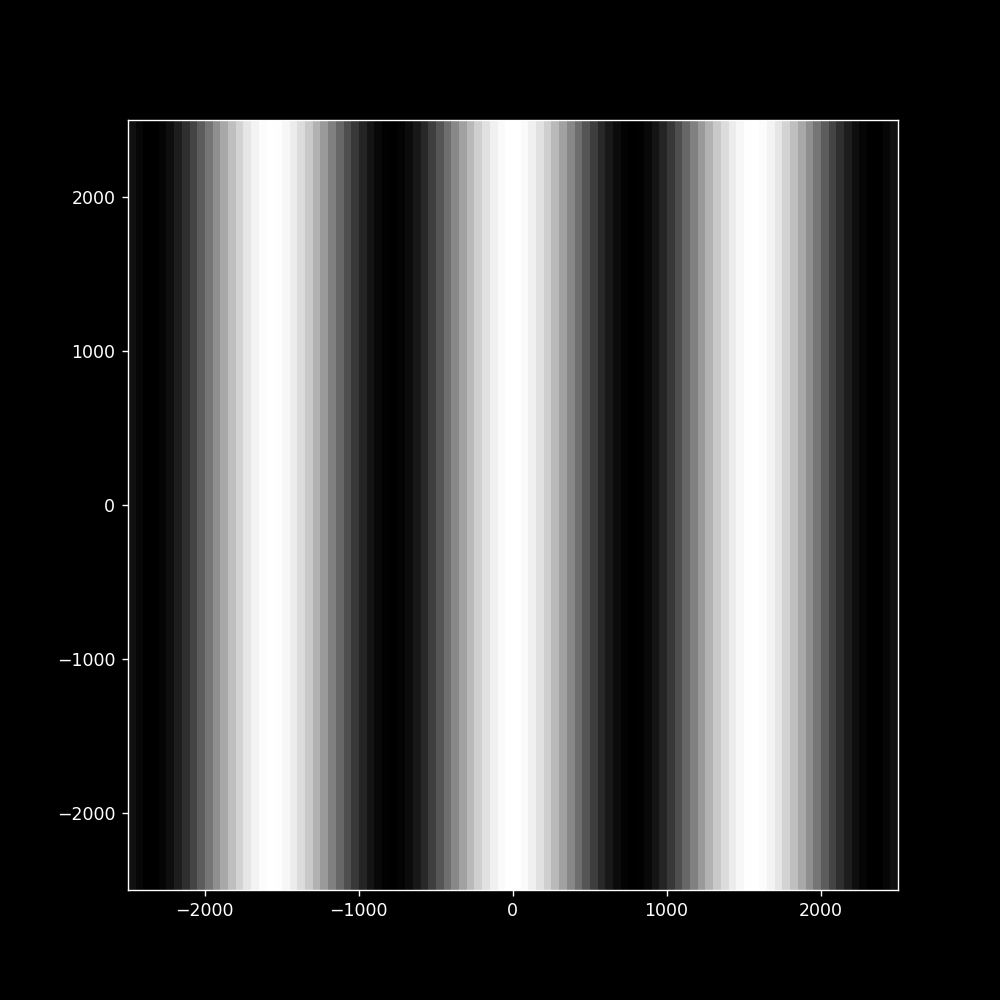

interactive(children=(FloatSlider(value=0.0, description='d', max=1.264, min=-1.264, step=0.0632), FloatSlider…

In [3]:
#2 Waves interference - Michelson - with Tilt - -fig 3.12 , 3.13
pl.style.use('dark_background')
fig=pl.figure(figsize=(8,8))
lbd=0.632 #wavelength= 0.632 micron
X, Y = np.mgrid[-2500:2500:100j, -2500:2500:100j] #screen of observation= 2500x2500 microns squared
@interact(gcc=(0,1.0), I2=(1,2,0.1), a=(0, 1e-3,1e-4), d=(-2*lbd,2*lbd, 0.1*lbd))
def I0(d=0,gcc=1, I2=1, a=0.0002):
    #d=d2-d1 , gcc=magnitude of the complex degree of coherence, I2=relative irradiance of beam 2
    #a=angle between the beams
    I1=2-I2
    I=I1+I2+2*sqrt(I1*I2)*gcc*np.cos((4*pi/lbd)*(Y*sin(a)+d))
    im=pl.imshow(I, vmin=0, vmax=4, extent=[-2500,2500,-2500,2500],cmap="gray")
    return d,gcc,I2,a    

<IPython.core.display.Javascript object>


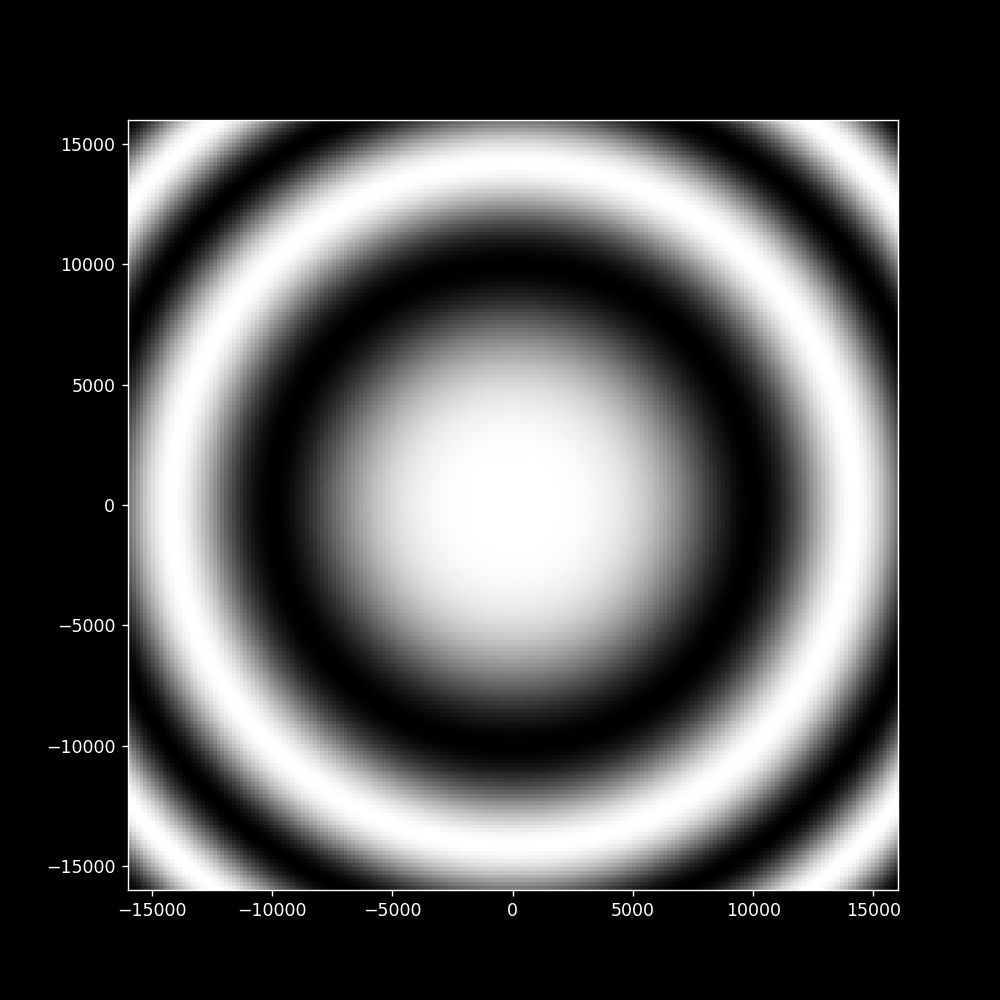

interactive(children=(FloatSlider(value=63.2, description='a', max=632.0, min=-632.0, step=6.32), FloatSlider(…

In [4]:
#2 Waves interference - Michelson - spherical waves - fig 3.20 -3.21
fig1=pl.figure(figsize=(8,8))
lbd=0.632 #wavelength= 0.632 micron
X, Y= np.mgrid[-16000:16000:200j, -16000:16000:200j] #screen of observation= 16000x16000 microns squared
r2=X**2+Y**2
I1=1.0
I2=1.0
@interact(a=(-1000*lbd,1000*lbd,10*lbd), da=(-1.1*lbd,1.1*lbd,lbd/10), z=(0,100000.,1000))
#a=distance between point sources - gross, da=distance between point sources - fine, z=position of the screen 
def I0(a=100*lbd, z=100000.0,da=0. ):
    s1=np.sqrt(r2+(((a+da)/2)-z)**2)
    s2=np.sqrt(r2+(((a+da)/2)+z)**2)
    print(r2.shape)
    I=I1+I2+2*sqrt(I1*I2)*np.cos((2*pi/lbd)*(s2-s1))
    im=pl.imshow(I, vmin=0, vmax=4, extent=[-16000,16000,-16000,16000],cmap="gray")
    return a/lbd,z/lbd, da/lbd  

<IPython.core.display.Javascript object>


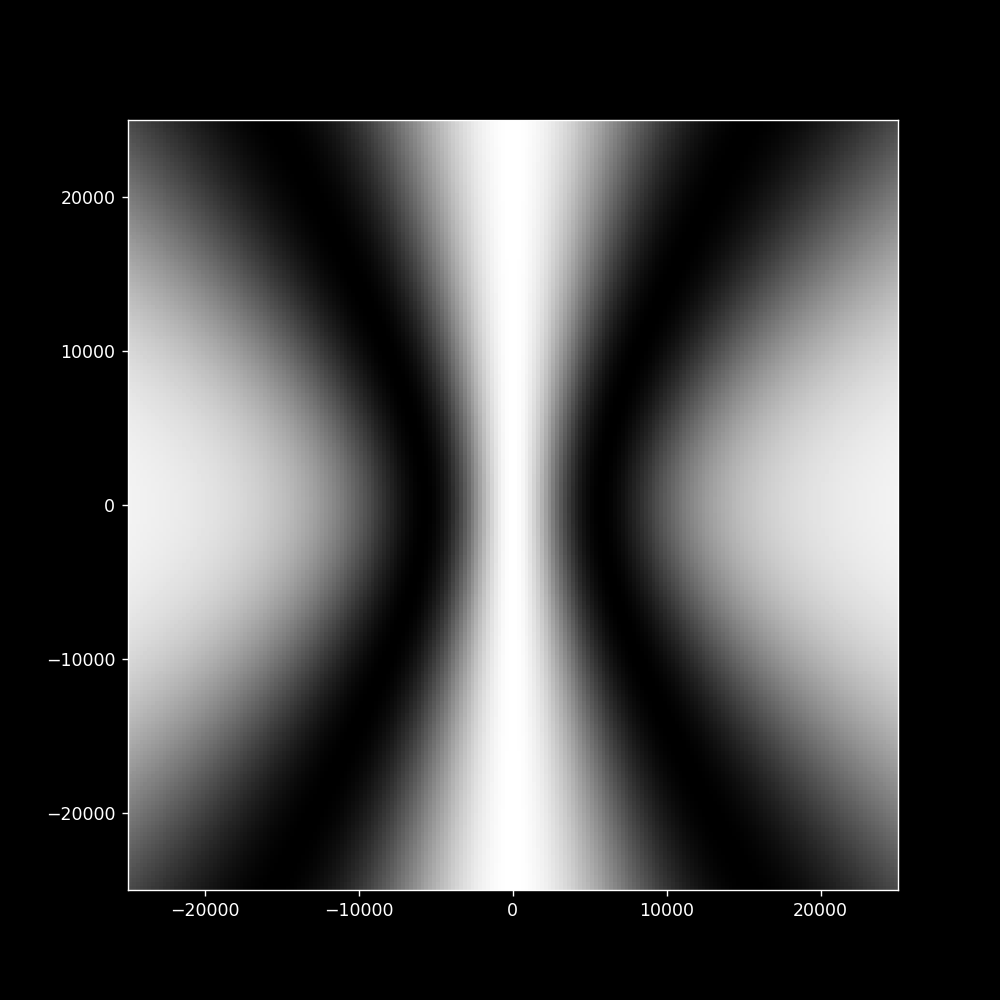

interactive(children=(FloatSlider(value=0.632, description='a', max=31.6, step=0.632), FloatSlider(value=10000…

In [5]:
#2 Waves interference - Michelson - spherical waves - tilted waves, x,z plane - fig. 3.17
fig1=pl.figure(figsize=(8,8))
lbd=0.632 #wavelength= 0.632 micron
X, Z= np.mgrid[-25000:25000:200j, -25000:25000:200j] #screen of observation= 16000x16000 microns squared
I1=1.0
I2=1.0
@interact(a=(0,50*lbd,lbd), da=(-1.1*lbd,1.1*lbd,lbd/10), y=(0,100000.,1000))
#a=distance between point sources - gross, da=distance between point sources - fine, z=position of the screen 
def I0(a=1*lbd, y=10000.0,da=0. ):
    r2=X**2+y**2
    s1=np.sqrt(r2+(((a+da)/2)-Z)**2)
    s2=np.sqrt(r2+(((a+da)/2)+Z)**2)
    print(r2.shape)
    I=I1+I2+2*sqrt(I1*I2)*np.cos((2*pi/lbd)*(s2-s1))
    im=pl.imshow(I, vmin=0, vmax=4, extent=[-25000,25000,-25000,25000],cmap="gray")
    return a/lbd,y/lbd, da/lbd  